In [1]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding

## Yinelemeli Sinir Ağı Katmanlarının Oluşturulması

BİR RNN KATMANI

In [2]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 34080 (133.12 KB)
Trainable params: 34080 (133.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


BOYUTLANDIRILMIŞ RNN KATMANI

In [3]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32, return_sequences= True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 34080 (133.12 KB)
Trainable params: 34080 (133.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ARDIŞIK RNN KATMANLARI

In [4]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 42400 (165.62 KB)
Trainable params: 4240

## IMDB VERİ KÜMESİNİN HAZIRLANMASI

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [6]:
num_features = 1000
maxlen = 500
batch_size = 32

In [7]:
print('Load data..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_features)
print('Pad sequence (sample x train)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(len(input_train), 'Eğitim Dizisi', input_train.shape)
print(len(input_test), 'Test Dizisi', input_test.shape)

Load data..
17464789/17464789 [==============================] - 2s 0us/step
Pad sequence (sample x train)
25000 Eğitim Dizisi (25000, 500)
25000 Test Dizisi (25000, 500)


EMBEDDING VE SIMPLE RNN KATMANLARININ EĞİTİLMESİ

In [8]:
from keras.layers import Dense
from keras import layers

**Basit RNN ile Modelleme**

In [20]:
model = Sequential()
model.add(Embedding(num_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 34113 (133.25 KB)
Trainable params: 34113 (133.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size= 128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 79s 491ms/step - loss: 0.5863 - acc: 0.6812 - val_loss: 1.1385 - val_acc: 0.5168
Epoch 2/10
157/157 [==============================] - 87s 553ms/step - loss: 0.4581 - acc: 0.7982 - val_loss: 0.4208 - val_acc: 0.8210
Epoch 3/10
157/157 [==============================] - 101s 645ms/step - loss: 0.3998 - acc: 0.8267 - val_loss: 0.3973 - val_acc: 0.8220
Epoch 4/10
157/157 [==============================] - 116s 736ms/step - loss: 0.3794 - acc: 0.8367 - val_loss: 0.4265 - val_acc: 0.8196
Epoch 5/10
157/157 [==============================] - 99s 628ms/step - loss: 0.3497 - acc: 0.8558 - val_loss: 0.3814 - val_acc: 0.8462
Epoch 6/10
157/157 [==============================] - 80s 511ms/step - loss: 0.3359 - acc: 0.8604 - val_loss: 0.3953 - val_acc: 0.8388
Epoch 7/10
157/157 [==============================] - 72s 462ms/step - loss: 0.3145 - acc: 0.8715 - val_loss: 0.5732 - val_acc: 0.7814
Epoch 8/10
157/157 [==============================] -

In [14]:
import matplotlib.pyplot as plt

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [16]:
epochs = range(1, len(acc)+1)

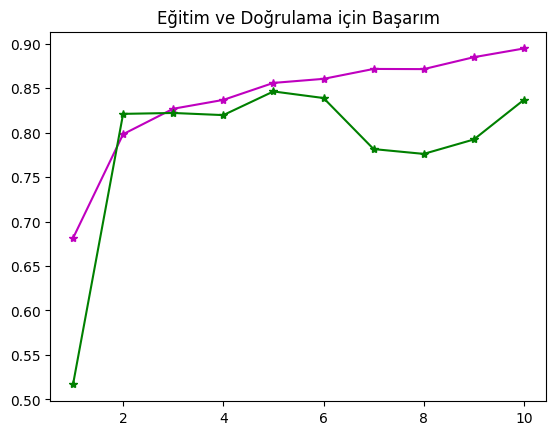

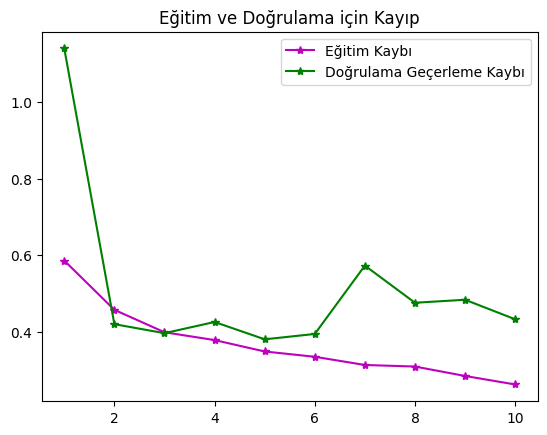

In [17]:
plt.plot(epochs, acc, 'm*-', label='Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g*-', label='Doğrulama Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama için Başarım')

plt.figure()
plt.plot(epochs, loss, 'm*-', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label='Doğrulama Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama için Kayıp')


plt.legend()
plt.show()


**Basit LSTM ile Modelleme**

In [21]:
model = Sequential()
model.add(layers.Embedding(num_features,32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          32000     
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 48705 (190.25 KB)
Trainable params: 48705 (190.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size= 128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 12s 50ms/step - loss: 0.6486 - acc: 0.6103 - val_loss: 0.5585 - val_acc: 0.7508
Epoch 2/10
157/157 [==============================] - 7s 43ms/step - loss: 0.4521 - acc: 0.8018 - val_loss: 0.3941 - val_acc: 0.8310
Epoch 3/10
157/157 [==============================] - 6s 35ms/step - loss: 0.3767 - acc: 0.8411 - val_loss: 0.4267 - val_acc: 0.8254
Epoch 4/10
157/157 [==============================] - 6s 40ms/step - loss: 0.3517 - acc: 0.8522 - val_loss: 0.3480 - val_acc: 0.8560
Epoch 5/10
157/157 [==============================] - 6s 36ms/step - loss: 0.3377 - acc: 0.8590 - val_loss: 0.4162 - val_acc: 0.8144
Epoch 6/10
157/157 [==============================] - 6s 35ms/step - loss: 0.3289 - acc: 0.8630 - val_loss: 0.3414 - val_acc: 0.8572
Epoch 7/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3195 - acc: 0.8692 - val_loss: 0.3351 - val_acc: 0.8560
Epoch 8/10
157/157 [==============================] - 5s 33ms/step -

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [23]:
epochs = range(1, len(acc)+1)

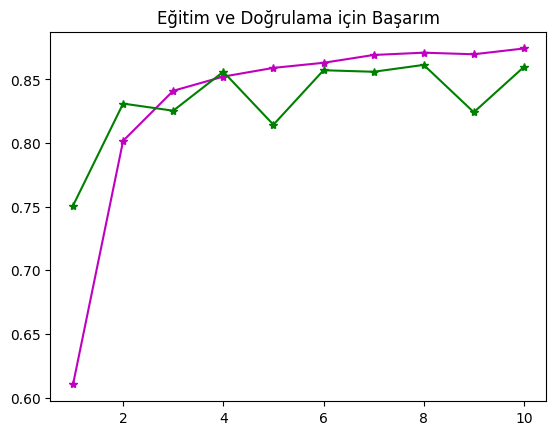

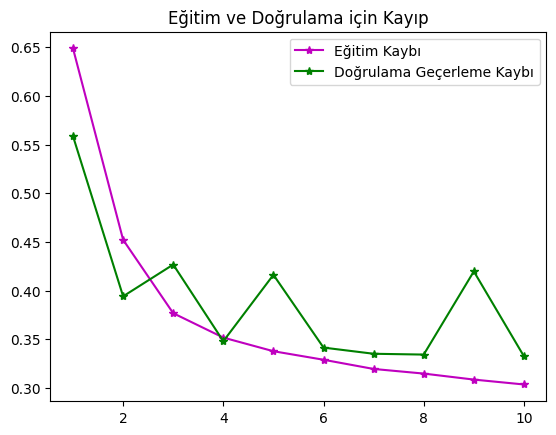

In [24]:
plt.plot(epochs, acc, 'm*-', label='Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g*-', label='Doğrulama Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama için Başarım')

plt.figure()
plt.plot(epochs, loss, 'm*-', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label='Doğrulama Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama için Kayıp')


plt.legend()
plt.show()


**LSTM de basit RNN e göre daha fazla parametre ile çalışılmıştır. Buna bağlı olarak grafiklerdeki validation değerleri daha stabil ilerlemiştir. Doğruluk oranı daha yüksek, kayıp oranı daha düşüktür.**